In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [219]:
df=pd.read_csv("../artifacts/raw/data.csv")

In [220]:
df.head()

#Quality_Control_Defect_Rate_%- It tells you how many products out of 100 failed to meet quality standards. Out of 100 completed products, 30 were rejected during quality testing because they didn’t meet standards (cracks, wrong size, etc.).
#Quality_Control_Defect_Rate_% = (30 / 100) * 100 = 30%

#Predictive_Maintenance_Score-This feature represents a numerical score indicating how urgently a machine is expected to require maintenance based on its current condition.

#Error_rate- It indicates the percentage of errors that occured during the production process. Suppose a robot arm is placing parts on a board. It tries to do this 1000 times, but 20 times it misses the spot.
#Error_Rate_% = (20 / 1000) * 100 = 2%


Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [221]:
df.shape

(100000, 13)

In [222]:
df.isnull().sum()

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64

In [223]:
df["Operation_Mode"].value_counts()

Operation_Mode
Active         70054
Idle           20057
Maintenance     9889
Name: count, dtype: int64

In [224]:
df["Efficiency_Status"].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [225]:
df.columns

Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status'],
      dtype='object')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  object 
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  object 
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              

DATA PROCESSING

In [227]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],errors='coerce') #Converting datetime to pandas datetime format and errors='coerce' will convert invalid parsing to NaT (Not a Time)

In [228]:
df.duplicated().sum() #Checking for duplicates in the dataset

np.int64(0)

In [229]:
categorical_cols=['Operation_Mode','Efficiency_Status'] #Because of lower memory usage and faster Speed
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  category      
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

EDA

In [231]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist() #Selecting numeric columns

In [232]:
numeric_cols

['Machine_ID',
 'Temperature_C',
 'Vibration_Hz',
 'Power_Consumption_kW',
 'Network_Latency_ms',
 'Packet_Loss_%',
 'Quality_Control_Defect_Rate_%',
 'Production_Speed_units_per_hr',
 'Predictive_Maintenance_Score',
 'Error_Rate_%']

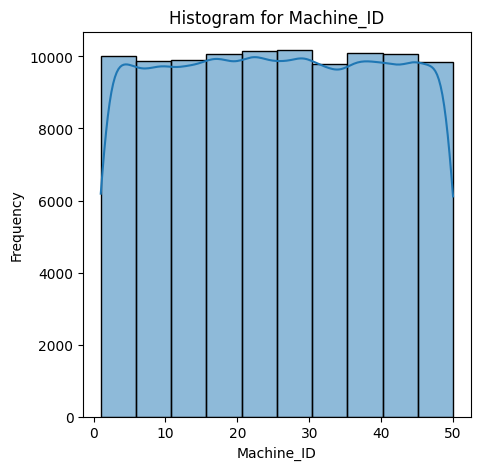

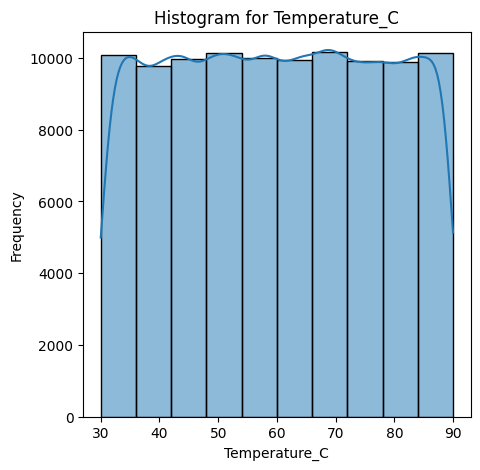

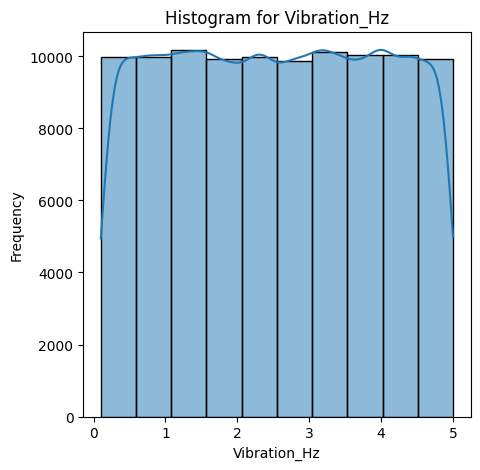

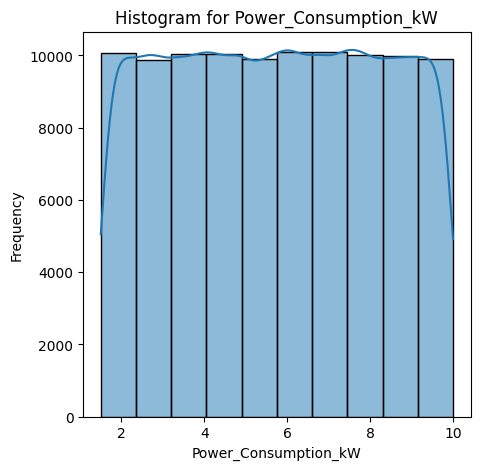

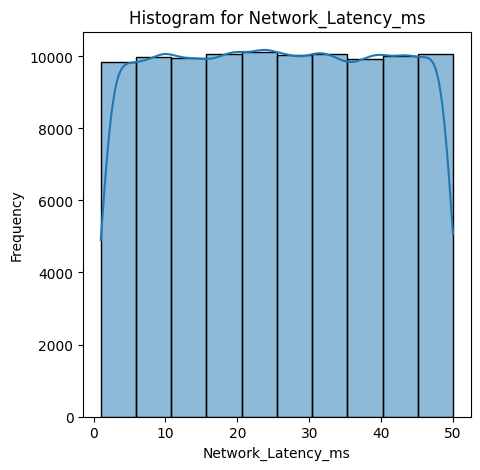

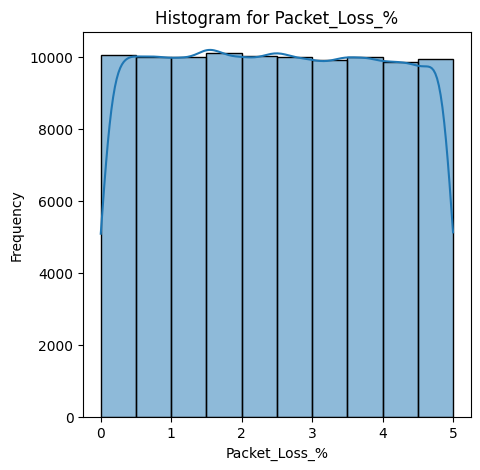

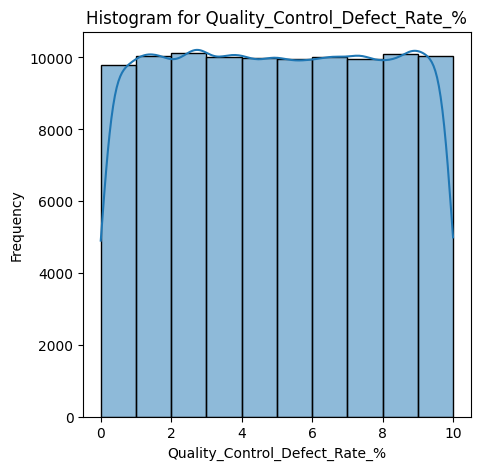

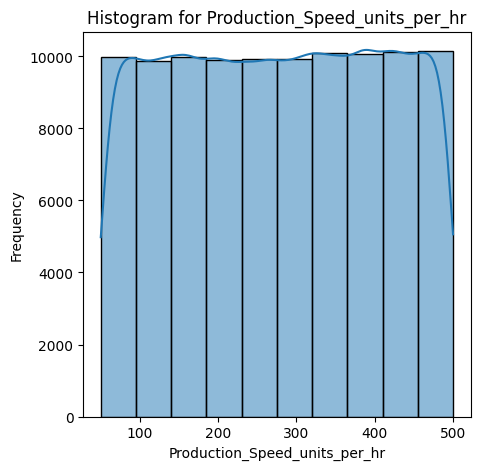

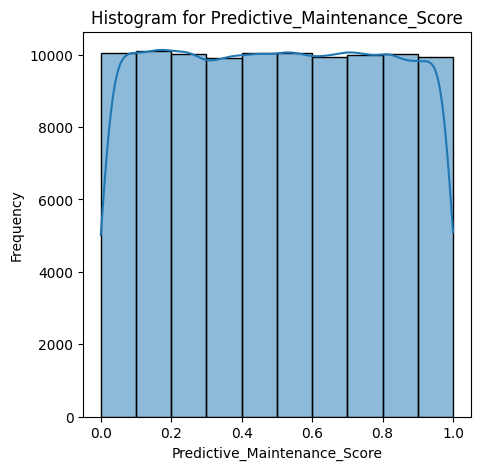

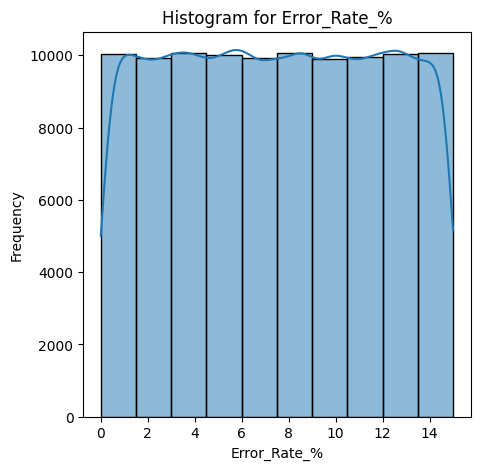

In [233]:
for col in numeric_cols:
    plt.figure(figsize=(5, 5))
    sns.histplot(df[col],bins=10,kde=True)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

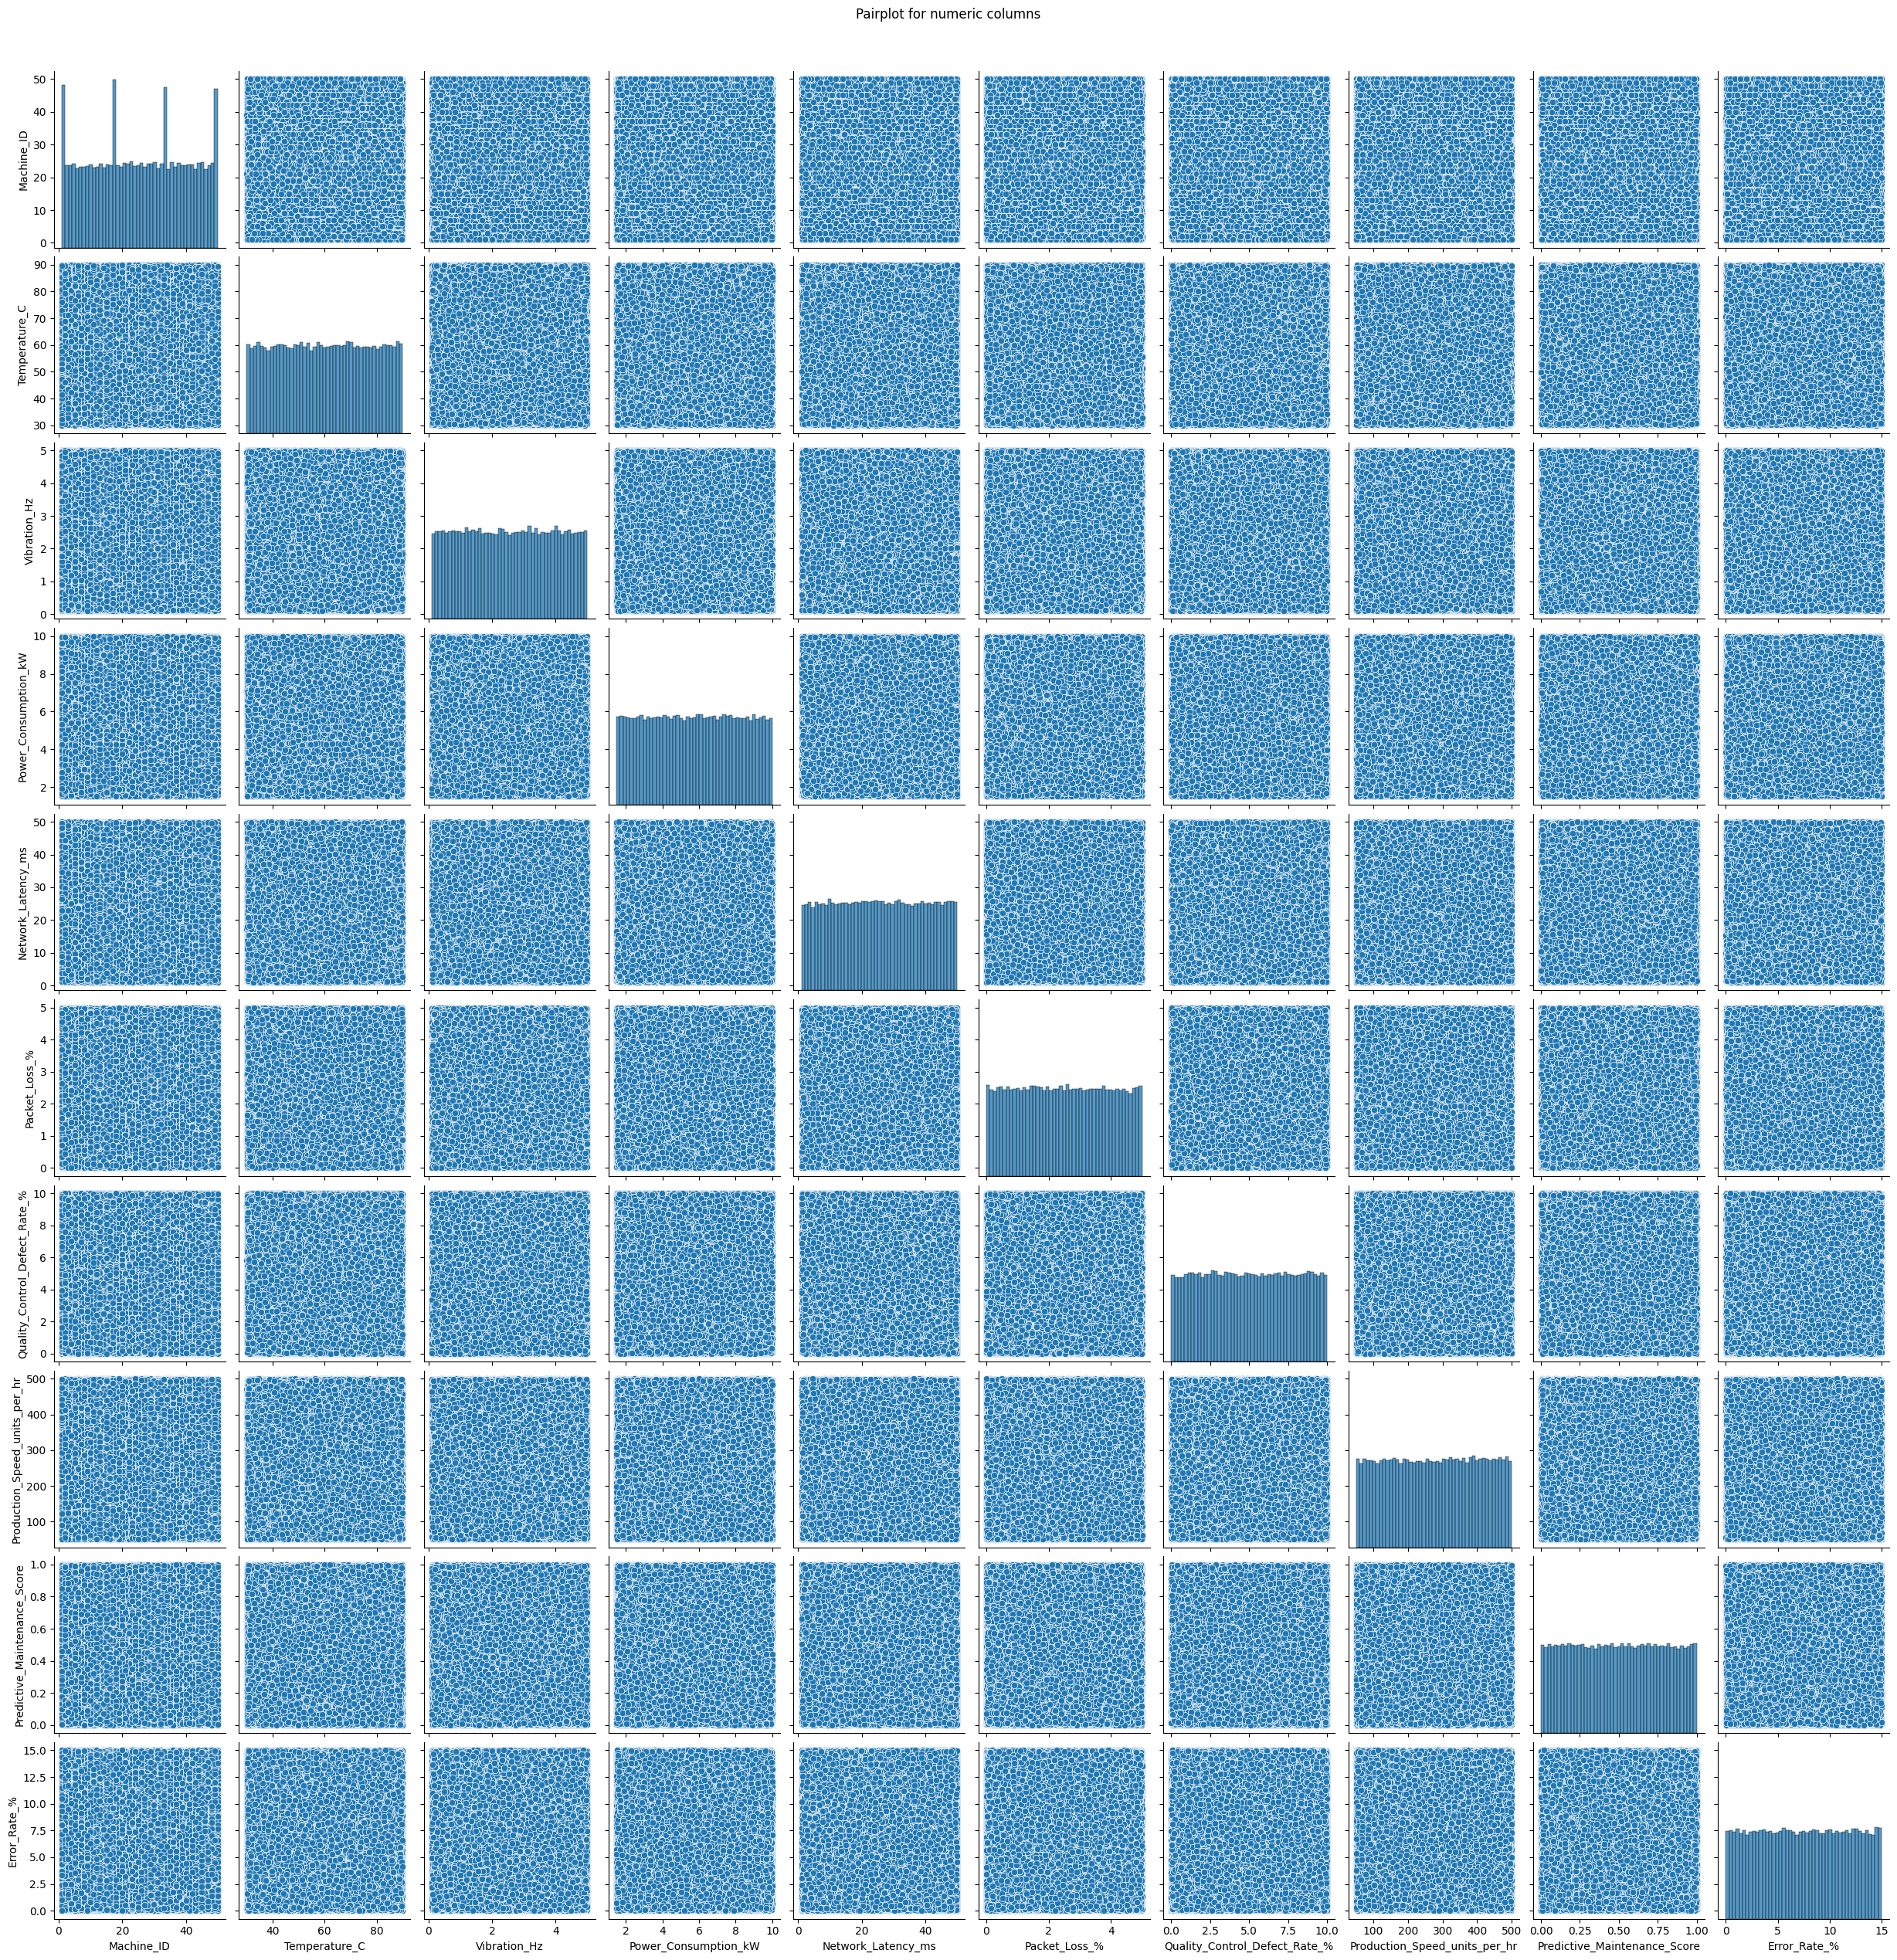

In [234]:
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairplot for numeric columns",y=1.02)
plt.show()

Text(0.5, 1.0, 'Effciency status countplot')

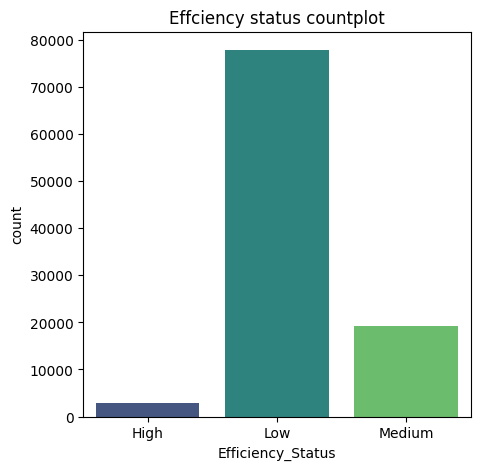

In [235]:
plt.figure(figsize=(5,5))
sns.countplot(x='Efficiency_Status',data=df,palette='viridis')
plt.title("Effciency status countplot")

Feature Engineering

In [236]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [237]:
#Splitting the timestamp into different columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

In [238]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  Year  Month  \
0                      0.344650     14.965470               Low  2024      1   
1                      0.769848      7.678270               Low  2024      1   
2                      0.987086      8.198391               Low  2024      1   
3                      0.983390      2.740847            Medium  2024      1   
4                      0.573117     12.100686               Low  2024      1   

   Day  Hour  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0

In [239]:
df.drop(columns=['Timestamp','Machine_ID'],inplace=True) #Dropping the timestamp and machine_ID column as we have already split it into different columns

In [240]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Efficiency_Target'] = label_encoder.fit_transform(df['Efficiency_Status'])

In [241]:
label_encoder = LabelEncoder()
df['Operation_Mode'] = label_encoder.fit_transform(df['Operation_Mode'])

In [242]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0               1      74.137590      3.500595              8.612162   
1               0      84.264558      3.355928              2.268559   
2               0      44.280102      2.079766              6.144105   
3               0      40.568502      0.298238              4.067825   
4               1      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  Hour  Efficiency_Target  
0               Low  2024      1    1     0                  1  
1               Low  2024      1    1     0                  1  
2               Low  2024      1    1     0                  1  
3            Medium  2024      1    1     0                  2  
4               Low  2024      1    1     0                  1

In [243]:
df["Efficiency_Status"].value_counts()


Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [244]:
df["Efficiency_Target"].value_counts()

Efficiency_Target
1    77825
2    19189
0     2986
Name: count, dtype: int64

In [245]:
df.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Efficiency_Status',
       'Year', 'Month', 'Day', 'Hour', 'Efficiency_Target'],
      dtype='object')

In [246]:
# features=['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
#        'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
#        'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
#        'Predictive_Maintenance_Score', 'Error_Rate_%', 
#        'Year', 'Month', 'Day', 'Hour']



features=['Error_Rate_%', 'Production_Speed_units_per_hr',
        'Network_Latency_ms', 'Power_Consumption_kW', 'Hour', 
        'Quality_Control_Defect_Rate_%']

In [247]:
X=df[features]

In [248]:
X.columns

Index(['Error_Rate_%', 'Production_Speed_units_per_hr', 'Network_Latency_ms',
       'Power_Consumption_kW', 'Hour', 'Quality_Control_Defect_Rate_%'],
      dtype='object')

In [249]:
X.head()

Error_Rate_%  Production_Speed_units_per_hr  Network_Latency_ms  \
0     14.965470                     477.657391           10.650542   
1      7.678270                     398.174747           29.111810   
2      8.198391                     108.074959           18.357292   
3      2.740847                     329.579410           29.153629   
4     12.100686                     159.113525           34.029191   

   Power_Consumption_kW  Hour  Quality_Control_Defect_Rate_%  
0              8.612162     0                       7.751261  
1              2.268559     0                       4.989172  
2              6.144105     0                       0.456816  
3              4.067825     0                       4.582974  
4              6.225737     0                       2.287716

In [250]:
y=df['Efficiency_Target']

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [252]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [253]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [254]:
y_pred=clf.predict(X_test_scaled)

In [255]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
stk_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42))
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5
)
stk_clf.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [256]:
y_pred_2=stk_clf.predict(X_test_scaled)

In [257]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [258]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9171


In [259]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy:", accuracy_2)

Accuracy: 0.9999


In [260]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')


0.8576180621967678

In [261]:
f1_score(y_test, y_pred_2, average='macro')


0.9998917123812535

In [262]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       597
           1       0.95      0.96      0.95     15565
           2       0.80      0.76      0.78      3838

    accuracy                           0.92     20000
   macro avg       0.87      0.85      0.86     20000
weighted avg       0.92      0.92      0.92     20000



In [263]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       1.00      1.00      1.00     15565
           2       1.00      1.00      1.00      3838

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [264]:
##Permutation Importance
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1,scoring='accuracy')



In [265]:
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

Feature  Importance
0                   Error_Rate_%    0.235330
1  Production_Speed_units_per_hr    0.118310
4                           Hour    0.000110
3           Power_Consumption_kW    0.000085
5  Quality_Control_Defect_Rate_%    0.000065
2             Network_Latency_ms    0.000060